Gradient of line = 3.999970


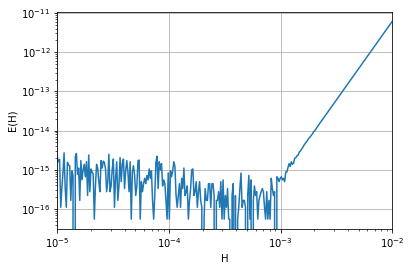

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg

a = 1
b = 2
N = np.round(np.logspace(2,5,300))
actual= 2*np.log(2)-1
Hlist = (b-a)/N
error = []

def simp(y,h):
    return (h/3)*(y[0]+y[-1]+\
    4*sum(y[1:-1:2])+2*sum(y[2:-1:2]))

for n in N:
    n2 = 2*n
    x = np.linspace(a,b,int(n2+1))
    y = np.log(x)
    h = (b-a)/n2
    estim = simp(y,h)
    error.append(actual-estim)
    
plt.loglog(Hlist , np.abs(error))
plt.xlim([1e-5,1e-2])
plt.xlabel('H')
plt.ylabel('E(H)')
plt.grid('on')
#plt.show()
plt.savefig('figsimp2.pdf')

k=(lg(error[0])-lg(error[50]))/\
  (lg(Hlist[0])-lg(Hlist[50]))
print('Gradient of line = %f' %k)


In [2]:
order = np.log(error[50]/error[51])/np.log(error[51]/error[52])
order

1.1373279456648655

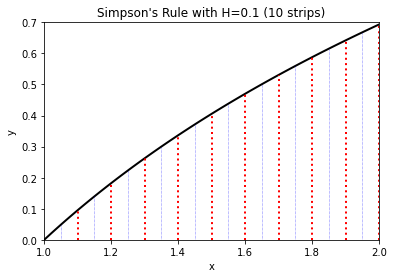

In [3]:
x= np.linspace(a,b,100)
y= np.log(x)
xnodes= np.linspace(a,b,11)
ynodes = np.log(xnodes)
h = xnodes[1]-xnodes[0]
plt.plot(x,y, 'k',lw=2)
for (a,b) in zip(xnodes,ynodes):
    plt.plot([a ,a],[0, b],'r:', lw=2)
    ao = a+h/2
    plt.plot([ao ,ao],[0, np.log(ao)],'b:', lw=0.5)
    
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([1,2]) 
plt.ylim([0,0.7]) 
plt.title("Simpson's Rule with H=0.1 (10 strips)")
#plt.show()
plt.savefig('figsimp1.pdf')